<a href="https://colab.research.google.com/github/Sara-Esm/NLP/blob/main/1_Bag_of_Words__TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emotion Classification Using NLP Techniques (Bag-of-Words & TF-IDF)

This project classifies emotions in Twitter messages using the Kaggle Emotion Classification dataset. It applies Bag-of-Words (BoW) and TF-IDF for feature extraction, with a K-Nearest Neighbors (KNN) model trained to predict six emotions: sadness, joy, love, anger, fear, and surprise.

In [18]:
#!pip install pandas
#!pip install sklearn

In [19]:
# This sets the tensorflow log level to "warn"
import os
import kagglehub
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [20]:
# Download dataset from Kaggle
path = kagglehub.dataset_download("bhavikjikadara/emotions-dataset")
print("Path to dataset files:", path)

# Load the dataset
dataset_path = f"{path}/emotions.csv"
dataset = pd.read_csv(dataset_path)

# Display dataset information
print("Dataset Shape:", dataset.shape)
print("Columns:", dataset.columns)
print("\nFirst few rows of the dataset:")
print(dataset.head())

Path to dataset files: /root/.cache/kagglehub/datasets/bhavikjikadara/emotions-dataset/versions/1
Dataset Shape: (416809, 2)
Columns: Index(['text', 'label'], dtype='object')

First few rows of the dataset:
                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [21]:
dataset

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [22]:
# Check for missing values
print("\nMissing values:", dataset.isnull().sum())


Missing values: text     0
label    0
dtype: int64


In [23]:
# Preprocessing: Drop rows with missing values
dataset.dropna(inplace=True)

In [24]:
# Extract features (text) and labels (emotion)
X = dataset["text"]
y = dataset["label"]  # Emotions: 0=sadness, 1=joy, 2=love, 3=anger, 4=fear, 5=surprise

In [25]:
# Bag-of-Words (BoW) approach
print("\n--- Bag-of-Words (BoW) ---")
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(X)

# Display vocabulary size and some sample words
print(f"There are {len(vectorizer_bow.get_feature_names_out())} unique words in the dataset.")
print("Sample vocabulary:", vectorizer_bow.get_feature_names_out()[:10])


--- Bag-of-Words (BoW) ---
There are 75276 unique words in the dataset.
Sample vocabulary: ['aa' 'aaa' 'aaaa' 'aaaaaaaaaaaaaaaaggghhhh'
 'aaaaaaaaaaaaaaarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggggggghhhhhhhhhhhhhh'
 'aaaaaaaall' 'aaaaaaand' 'aaaaaand' 'aaaaah' 'aaaaahhhhhh']


In [26]:
# Train and evaluate a KNN model using BoW features
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=42)

model_bow = KNeighborsClassifier(n_neighbors=3)
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("BoW Model Accuracy:", accuracy_bow)

BoW Model Accuracy: 0.5381108898538902


In [27]:
# TF-IDF approach
print("\n--- TF-IDF ---")
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Display vocabulary size and some sample words
print(f"There are {len(vectorizer_tfidf.get_feature_names_out())} unique words in the dataset.")
print("Sample vocabulary:", vectorizer_tfidf.get_feature_names_out()[:10])


--- TF-IDF ---
There are 75276 unique words in the dataset.
Sample vocabulary: ['aa' 'aaa' 'aaaa' 'aaaaaaaaaaaaaaaaggghhhh'
 'aaaaaaaaaaaaaaarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggggggghhhhhhhhhhhhhh'
 'aaaaaaaall' 'aaaaaaand' 'aaaaaand' 'aaaaah' 'aaaaahhhhhh']


In [28]:
# Train and evaluate a KNN model using TF-IDF features
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

model_tfidf = KNeighborsClassifier(n_neighbors=3)
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("TF-IDF Model Accuracy:", accuracy_tfidf)

TF-IDF Model Accuracy: 0.7044616651871756


Confusion Matrix (BoW):
[[26760  6310   501  1508  1111    71]
 [11655 26704  1961   984   719   232]
 [ 3177  4132  2487   243   182    20]
 [ 6454  3611   349  6129   721    31]
 [ 5349  3135   292   810  4387   421]
 [ 1589  1356   108   183   541   820]]

Confusion Matrix (TF-IDF):
[[30746  3186   330  1097   832    70]
 [ 6199 32590  2125   598   511   232]
 [ 1957  3372  4616   152   128    16]
 [ 3814  1997   199 10688   574    23]
 [ 3265  2014   209   685  7720   501]
 [  974  1109    82   129   575  1728]]


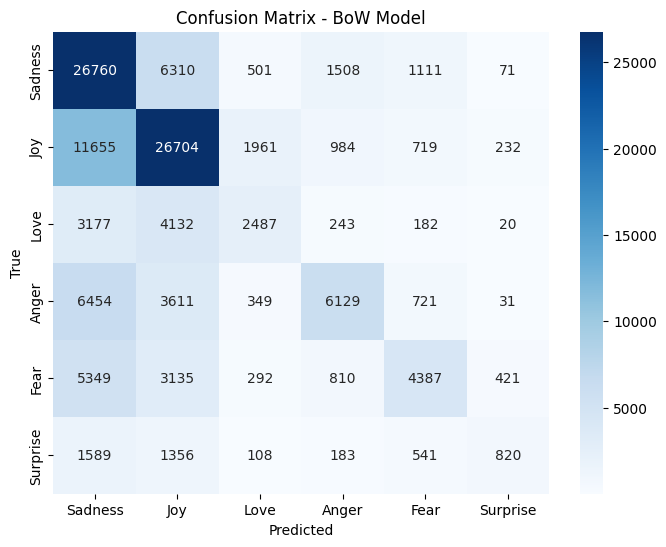

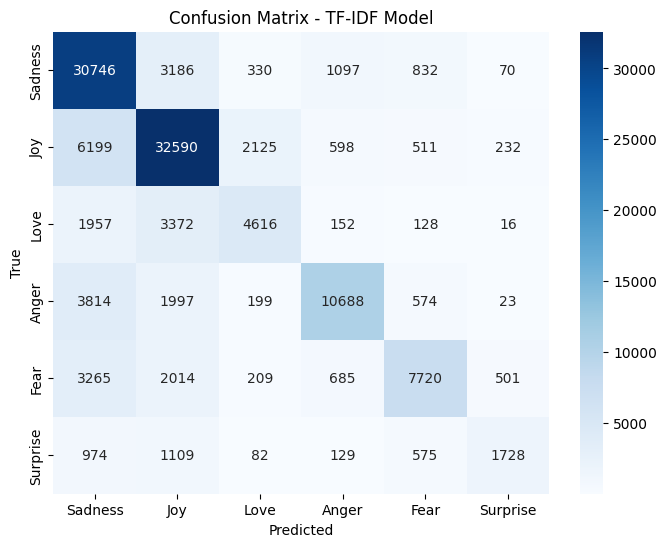


Classification Report (BoW):
              precision    recall  f1-score   support

           0       0.49      0.74      0.59     36261
           1       0.59      0.63      0.61     42255
           2       0.44      0.24      0.31     10241
           3       0.62      0.35      0.45     17295
           4       0.57      0.30      0.40     14394
           5       0.51      0.18      0.26      4597

    accuracy                           0.54    125043
   macro avg       0.54      0.41      0.44    125043
weighted avg       0.55      0.54      0.52    125043


Classification Report (TF-IDF):
              precision    recall  f1-score   support

           0       0.65      0.85      0.74     36261
           1       0.74      0.77      0.75     42255
           2       0.61      0.45      0.52     10241
           3       0.80      0.62      0.70     17295
           4       0.75      0.54      0.62     14394
           5       0.67      0.38      0.48      4597

    accuracy  

In [34]:
# Examine the confusion matrix for both BoW and TF-IDF models

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for BoW Model
cm_bow = confusion_matrix(y_test, y_pred_bow)
print("Confusion Matrix (BoW):")
print(cm_bow)

# Confusion Matrix for TF-IDF Model
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
print("\nConfusion Matrix (TF-IDF):")
print(cm_tfidf)

# Plotting the Confusion Matrix for BoW Model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bow, annot=True, fmt="d", cmap="Blues", xticklabels=["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"], yticklabels=["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"])
plt.title("Confusion Matrix - BoW Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plotting the Confusion Matrix for TF-IDF Model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tfidf, annot=True, fmt="d", cmap="Blues", xticklabels=["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"], yticklabels=["Sadness", "Joy", "Love", "Anger", "Fear", "Surprise"])
plt.title("Confusion Matrix - TF-IDF Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report for BoW Model
print("\nClassification Report (BoW):")
print(classification_report(y_test, y_pred_bow))

# Classification Report for TF-IDF Model
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf))

In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_bow, y_train)
print("Logistic Regression Accuracy:", model_lr.score(X_test_bow, y_test))

Logistic Regression Accuracy: 0.8967715106003534


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
